<a href="https://colab.research.google.com/github/MunroRoss/E-Portfolio/blob/main/Machine%20Learning/Neural_Network_Models_for_Object_Recognition_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Models for Object Recognition

Your primary objective is to design the neural networks and assess the model's efficacy. It's imperative to partition a validation set from the provided training dataset.

CIFAR-10 hosted in Kaggle, or directly in keras-datasets. Hence you would have access to:

* A Training set
* A Validation set
* A Testing set

Your ML model should address following points:

1. Outline the method you used to partition the validation set from the training data and provide insights into the data specifics (metadata).
2. Explain the importance of maintaining a separate validation set.
3. Elaborate on the architecture of the Artificial Neural Network.
4. Delve into the chosen activation function.
5. Describe the loss function implemented.
6. Detail the number of epochs utilised in the modeling process.
7. Share insights on your strategy regarding the Neural Network's design elements.
8. Conclude with reflections on the learnings acquired throughout the activity.
The required language for data mining for this assignment is Python.

[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html#:~:text=CIFAR-10%20python%20version)

[Kaggle](https://www.kaggle.com/c/cifar-10)

  - Becoming one with the data
  - Preparing data for modelling
  - Creating a CNN model (starting with a baseline)
  - Fitting a model (getting it to find patterns in our data)
  - Evaluating a model
  - Improving a model
  - Making a prediction with a trained model

This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Loading the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

Label	Description:
* 0	airplane
* 1	automobile
* 2	bird
* 3	cat
* 4	deer
* 5	dog
* 6	frog
* 7	horse
* 8	ship
* 9	truck

In [ ]:
# Create a list of class names so index is the label
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
len(class_names)

10

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
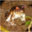

In [ ]:
#Visualise
x_train[0]

In [ ]:
class_names[y_train[0][0]]

'frog'

In [ ]:
# Spliting the training data into a training and validation set
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

have split the original training set into training and validation 80% training and 20% valisation.

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 1), (10000, 1))

array([[[34, 36, 43],
        [37, 37, 51],
        [44, 44, 64],
        ...,
        [62, 73, 93],
        [52, 63, 83],
        [45, 57, 77]],

       [[35, 35, 37],
        [34, 34, 40],
        [34, 33, 43],
        ...,
        [58, 69, 89],
        [50, 60, 80],
        [47, 58, 78]],

       [[34, 33, 35],
        [33, 32, 36],
        [33, 32, 38],
        ...,
        [66, 77, 97],
        [51, 62, 82],
        [53, 64, 84]],

       ...,

       [[32, 32, 38],
        [32, 31, 37],
        [33, 33, 38],
        ...,
        [41, 38, 45],
        [34, 31, 38],
        [36, 32, 40]],

       [[33, 31, 36],
        [32, 30, 36],
        [34, 32, 37],
        ...,
        [37, 35, 40],
        [32, 29, 35],
        [30, 28, 33]],

       [[37, 32, 35],
        [37, 32, 36],
        [37, 33, 36],
        ...,
        [49, 47, 49],
        [47, 45, 48],
        [58, 56, 58]]], dtype=uint8)
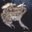

In [ ]:
x_train[0]

In [ ]:
class_names[y_train[0][0]]

'frog'

In [ ]:
type(x_train)

numpy.ndarray

Need to convert the data into tensors as well as normalise them

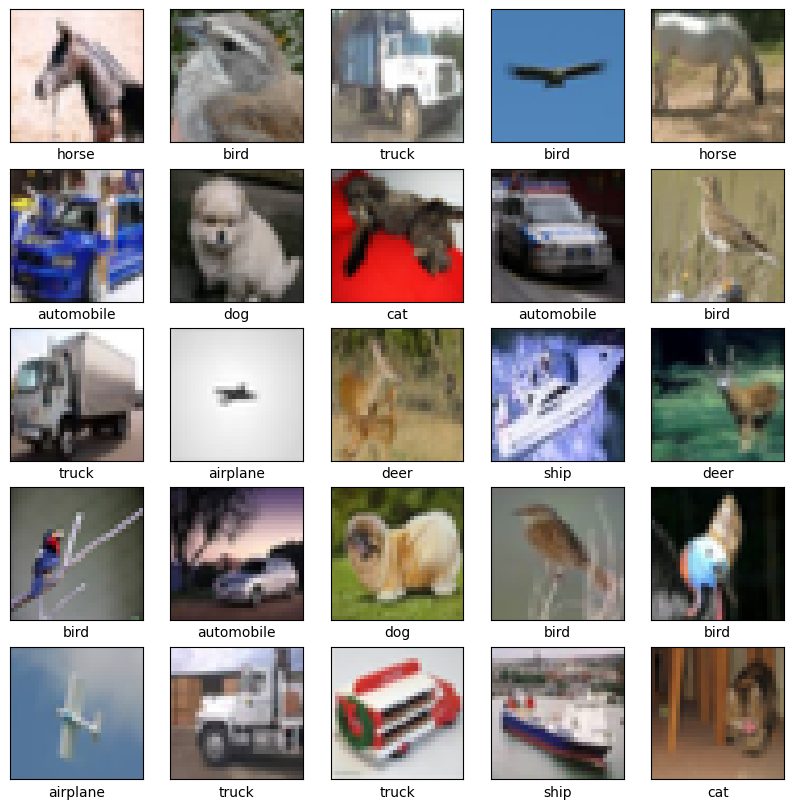

In [ ]:
# Lets visualise the data with random images
import random

plt.figure(figsize=(10,10))
for i in range(25):
    random_index = random.randint(0, len(x_train))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[random_index])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[random_index][0]])
plt.show()

In [ ]:
#normalise the data
normalised_x_train = x_train/255.
normalised_x_val = x_val/255.
normalised_x_test = x_test/255.

normalised_x_train[0]

array([[[0.13333333, 0.14117647, 0.16862745],
        [0.14509804, 0.14509804, 0.2       ],
        [0.17254902, 0.17254902, 0.25098039],
        ...,
        [0.24313725, 0.28627451, 0.36470588],
        [0.20392157, 0.24705882, 0.3254902 ],
        [0.17647059, 0.22352941, 0.30196078]],

       [[0.1372549 , 0.1372549 , 0.14509804],
        [0.13333333, 0.13333333, 0.15686275],
        [0.13333333, 0.12941176, 0.16862745],
        ...,
        [0.22745098, 0.27058824, 0.34901961],
        [0.19607843, 0.23529412, 0.31372549],
        [0.18431373, 0.22745098, 0.30588235]],

       [[0.13333333, 0.12941176, 0.1372549 ],
        [0.12941176, 0.1254902 , 0.14117647],
        [0.12941176, 0.1254902 , 0.14901961],
        ...,
        [0.25882353, 0.30196078, 0.38039216],
        [0.2       , 0.24313725, 0.32156863],
        [0.20784314, 0.25098039, 0.32941176]],

       ...,

       [[0.1254902 , 0.1254902 , 0.14901961],
        [0.1254902 , 0.12156863, 0.14509804],
        [0.12941176, 0

I could add the rescal the data in the model using `layers.Rescaling(1./255)`. I might try later.

In [ ]:
# Import to create model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
#create base model
model_1 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation='relu', input_shape=(32,32,3)),
    MaxPool2D(),
    Conv2D(filters = 10, kernel_size = 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile the model
model_1.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

In [ ]:
# fit the model
history_1 = model_1.fit(
    normalised_x_train, y_train,
    validation_data = (normalised_x_val, y_val),
    epochs = 10
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3003 - loss: 1.9306 - val_accuracy: 0.4300 - val_loss: 1.5571
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4622 - loss: 1.5107 - val_accuracy: 0.4825 - val_loss: 1.4495
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4973 - loss: 1.4173 - val_accuracy: 0.5316 - val_loss: 1.3477
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5278 - loss: 1.3389 - val_accuracy: 0.5448 - val_loss: 1.3110
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5471 - loss: 1.2804 - val_accuracy: 0.5524 - val_loss: 1.3030
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5579 - loss: 1.2582 - val_accuracy: 0.5661 - val_loss: 1.2540
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5671 - loss: 1.2414 - val_accuracy: 0.5667 - val_loss: 1.2483
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5835 - loss: 1.1955 - 

In [ ]:
40000/1250

32.0

Default batch size is 32.

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

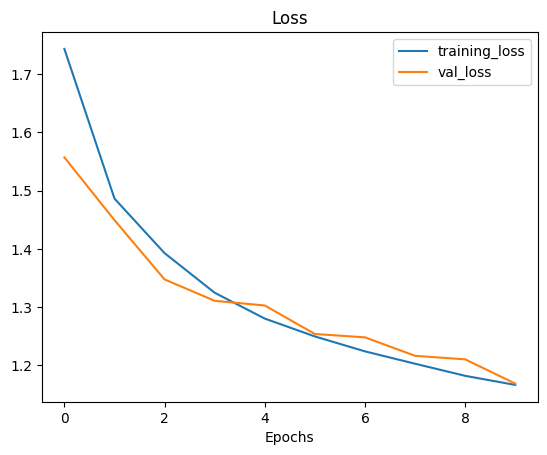

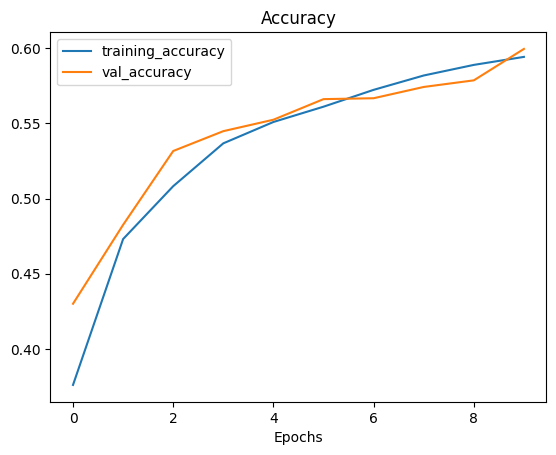

In [ ]:
plot_loss_curves(history_1)

Loss curves show that the model is slightly overfitting, need to implement changes to reduce this.

In [ ]:
# Check model Architecture
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 10)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 360)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           3,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,402 (56.26 KB)

 Trainable params: 4,800 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,602 (37.51 KB)

In [ ]:
# Try tiny VGG model from CNN explainer

#Create Model
#create base model
model_2 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation='relu', input_shape=(32,32,3)),
    Conv2D(filters = 10, kernel_size = 3, activation='relu'),
    MaxPool2D(),
    Conv2D(filters = 10, kernel_size = 3, activation='relu'),
    Conv2D(filters = 10, kernel_size = 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_2.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

# Fit the model
history_2 = model_2.fit(
    normalised_x_train, y_train,
    validation_data = (normalised_x_val, y_val),
    epochs = 10
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2751 - loss: 1.9425 - val_accuracy: 0.4364 - val_loss: 1.5286
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4486 - loss: 1.5241 - val_accuracy: 0.4920 - val_loss: 1.4054
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4838 - loss: 1.4304 - val_accuracy: 0.5120 - val_loss: 1.3421
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5179 - loss: 1.3500 - val_accuracy: 0.5286 - val_loss: 1.3045
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5464 - loss: 1.2831 - val_accuracy: 0.5441 - val_loss: 1.2895
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5651 - loss: 1.2357 - val_accuracy: 0.5669 - val_loss: 1.2176
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5691 - loss: 1.2113 - val_accuracy: 0.5743 - val_loss: 1.1873
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5814 - loss: 1.1768 - 

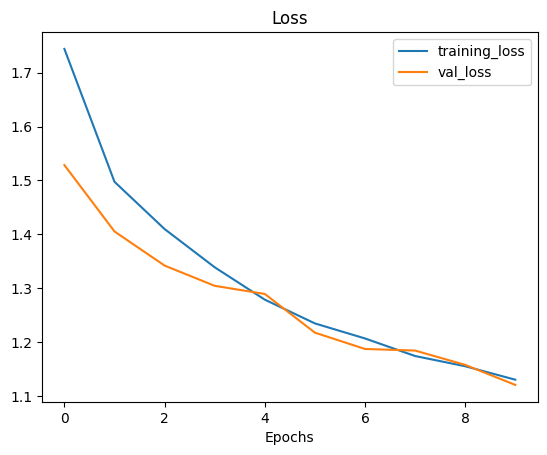

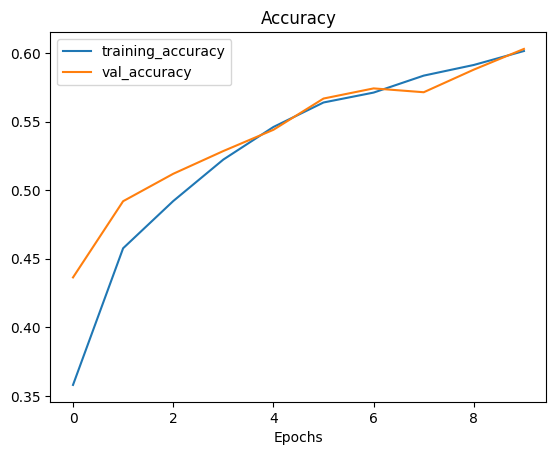

In [ ]:
plot_loss_curves(history_2)

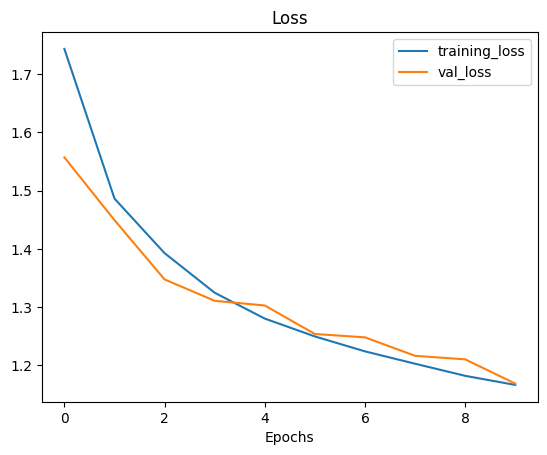

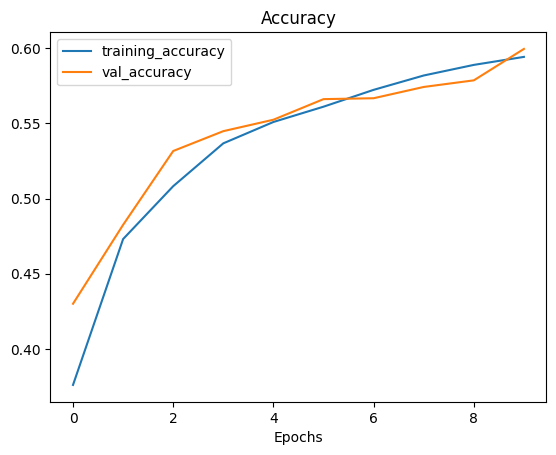

In [ ]:
plot_loss_curves(history_1)

In [ ]:
#Compare results from adding a couple of convolutional layers

model_1.evaluate(normalised_x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5917 - loss: 1.1734


[1.1704106330871582, 0.5929999947547913]

In [ ]:
model_2.evaluate(normalised_x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5984 - loss: 1.1333


[1.1408580541610718, 0.5931000113487244]

In [ ]:
model_1.summary()
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 10)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 360)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           3,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,402 (56.26 KB)

 Trainable params: 4,800 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,602 (37.51 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 10)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 10, 10, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,562 (64.70 KB)

 Trainable params: 5,520 (21.56 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,042 (43.14 KB)

It seems model 1 and model 2 are similar.

In [ ]:
# Try one with and extra conv2d and maxpool
model_3 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation='relu', input_shape=(32,32,3)),
    MaxPool2D(),
    Conv2D(filters = 10, kernel_size = 3, activation='relu'),
    MaxPool2D(),
    Conv2D(filters = 10, kernel_size = 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_3.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

# Fit the model
history_3 = model_3.fit(
    normalised_x_train, y_train,
    validation_data = (normalised_x_val, y_val),
    epochs = 10
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2024 - loss: 2.1112 - val_accuracy: 0.3621 - val_loss: 1.7308
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.3662 - loss: 1.7134 - val_accuracy: 0.4097 - val_loss: 1.5972
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4174 - loss: 1.5886 - val_accuracy: 0.4548 - val_loss: 1.5006
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4500 - loss: 1.5120 - val_accuracy: 0.4696 - val_loss: 1.4514
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4790 - loss: 1.4400 - val_accuracy: 0.4806 - val_loss: 1.4387
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4905 - loss: 1.4165 - val_accuracy: 0.5012 - val_loss: 1.3916
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5100 - loss: 1.3754 - val_accuracy: 0.5135 - val_loss: 1.3640
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5154 - loss: 1.3527 - 

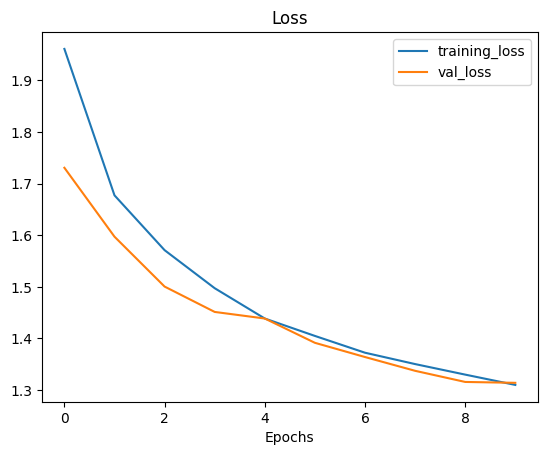

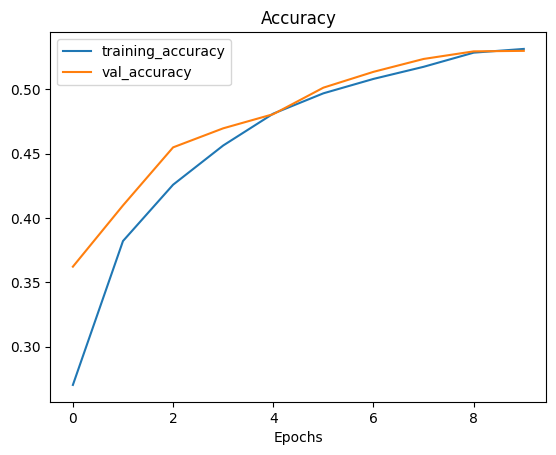

In [ ]:
plot_loss_curves(history_3)

In [ ]:
#compare model_3 to model_1
model_3.evaluate(normalised_x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5344 - loss: 1.3172


[1.3199951648712158, 0.5325000286102295]

In [ ]:
model_1.evaluate(normalised_x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5917 - loss: 1.1734


[1.1704106330871582, 0.5929999947547913]

model 3 has less overfitting than model 1 however is less accurate.

### Let's Augment the data

In [ ]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
#specify image shape
img_shape = (32, 32, 3)

# Augmentation layers
data_augmentation = Sequential([
    RandomFlip("horizontal",
               input_shape = img_shape),
    RandomRotation(0.1),
    RandomZoom(0.1),
])

NameError: name 'Sequential' is not defined

In [ ]:
x_train[0].shape

(32, 32, 3)

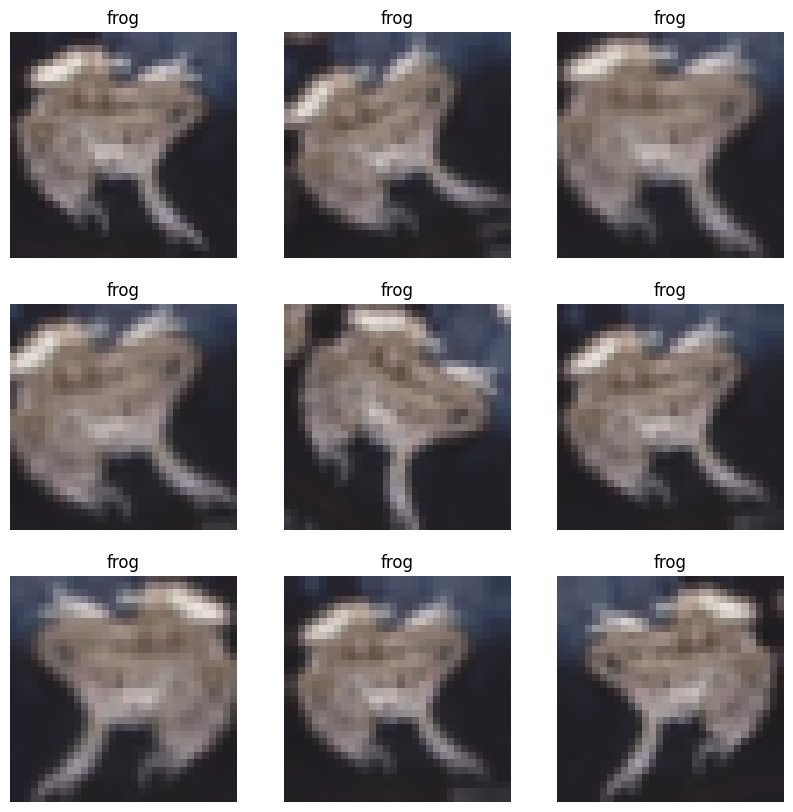

In [ ]:
plt.figure(figsize=(10, 10))

img = normalised_x_train

for i in range(9):
  augmented_images = data_augmentation(img)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_images[0])
  plt.axis("off")
  plt.title(class_names[y_train[0][0]])

In [ ]:
# try creating a model with data augmentation
model_4 = Sequential([
    data_augmentation,
    Conv2D(filters = 10, kernel_size = 3, activation='relu', input_shape=(32,32,3)),
    MaxPool2D(),
    Conv2D(filters = 10, kernel_size = 3, activation='relu'),
    MaxPool2D(),
    Conv2D(filters = 10, kernel_size = 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile
model_4.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

#fit the model
history_4 = model_4.fit(
    normalised_x_train, y_train,
    validation_data = (normalised_x_val, y_val),
    epochs = 10
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2112 - loss: 2.0934 - val_accuracy: 0.3625 - val_loss: 1.7405
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3609 - loss: 1.7575 - val_accuracy: 0.3872 - val_loss: 1.7118
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3897 - loss: 1.6743 - val_accuracy: 0.4215 - val_loss: 1.6244
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4128 - loss: 1.6175 - val_accuracy: 0.4376 - val_loss: 1.5734
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4252 - loss: 1.5750 - val_accuracy: 0.4419 - val_loss: 1.5428
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4290 - loss: 1.5658 - val_accuracy: 0.4539 - val_loss: 1.5260
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4414 - loss: 1.5348 - val_accuracy: 0.4512 - val_loss: 1.5216
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4581 - loss: 1.50

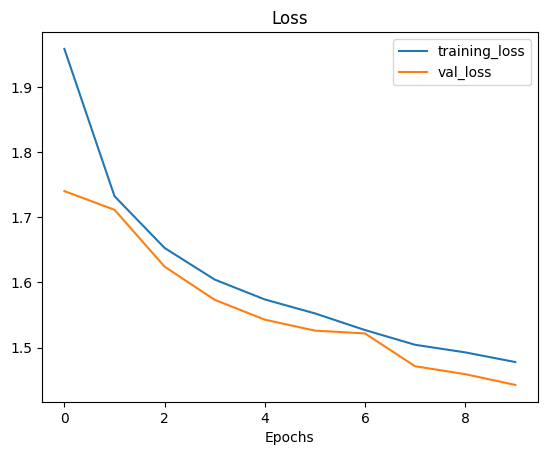

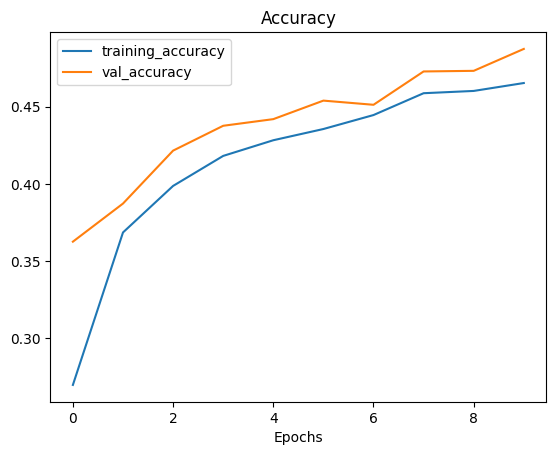

In [ ]:
plot_loss_curves(history_4)

In [ ]:
# Lets compare models
model_4.evaluate(normalised_x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4911 - loss: 1.4375


[1.4404958486557007, 0.4871000051498413]

In [ ]:
model_3.evaluate(normalised_x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5344 - loss: 1.3172


[1.3199951648712158, 0.5325000286102295]

In [ ]:
model_1.evaluate(normalised_x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5917 - loss: 1.1734


[1.1704106330871582, 0.5929999947547913]

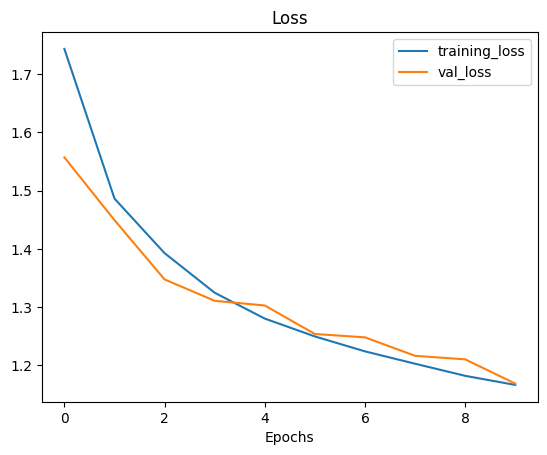

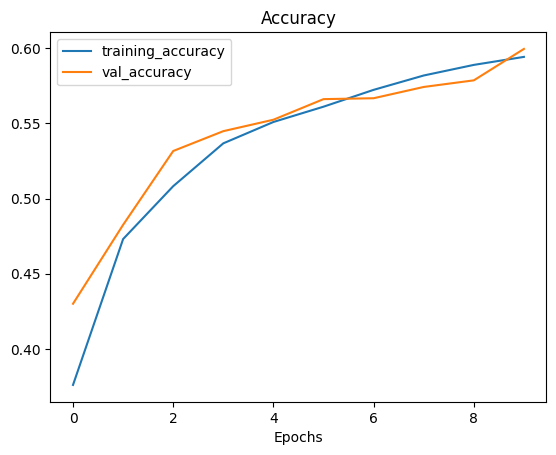

In [ ]:
plot_loss_curves(history_1)

It seems that the problem of overfitting has been resolved with data augmentation.

Just for comparison, lets try model_1 with data augmentation to compare.

In [ ]:
#create base model
model_5 = Sequential([
    data_augmentation,
    Conv2D(filters = 10, kernel_size = 3, activation='relu', input_shape=(32,32,3)),
    MaxPool2D(),
    Conv2D(filters = 10, kernel_size = 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# compile
model_5.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

#fit the model
history_5 = model_5.fit(
    normalised_x_train, y_train,
    validation_data = (normalised_x_val, y_val),
    epochs = 10
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2630 - loss: 2.0117 - val_accuracy: 0.4126 - val_loss: 1.6482
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4145 - loss: 1.6419 - val_accuracy: 0.4482 - val_loss: 1.5868
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4437 - loss: 1.5698 - val_accuracy: 0.4712 - val_loss: 1.5025
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4624 - loss: 1.5145 - val_accuracy: 0.4839 - val_loss: 1.4569
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4771 - loss: 1.4785 - val_accuracy: 0.4890 - val_loss: 1.4700
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4900 - loss: 1.4538 - val_accuracy: 0.4809 - val_loss: 1.5358
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4917 - loss: 1.4282 - val_accuracy: 0.5185 - val_loss: 1.3578
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5039 - loss: 1.4025 

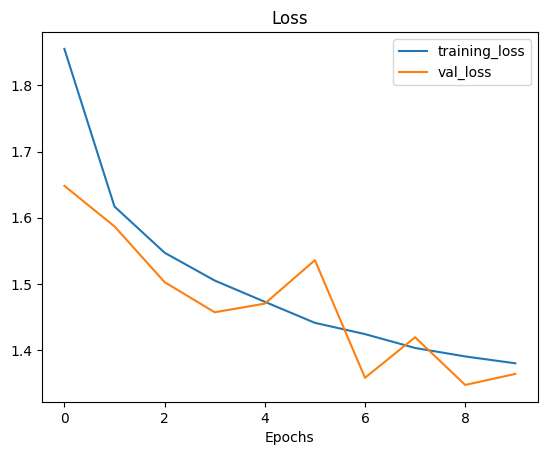

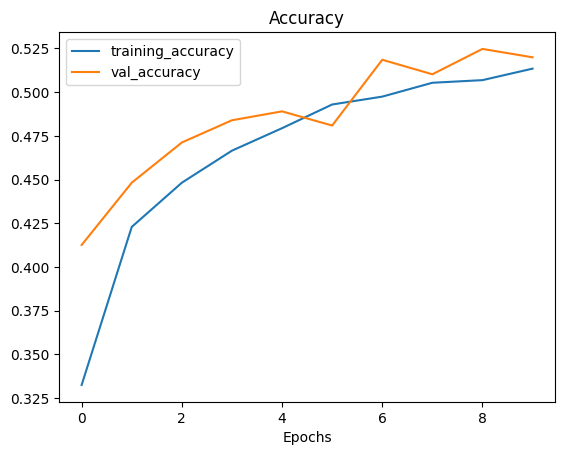

In [ ]:
plot_loss_curves(history_5)

while the validationaccuracy of model_1 seems higher, the loss curves are much more volatile. last lets dry dropout.

In [ ]:
from tensorflow.keras.layers import Dropout, Rescaling

# try creating a model with data augmentation
model_6 = Sequential([
    Rescaling(1./255),
    data_augmentation,
    Conv2D(filters = 10, kernel_size = 3, activation='relu', input_shape=(32,32,3)),
    MaxPool2D(),
    Conv2D(filters = 10, kernel_size = 3, activation='relu'),
    MaxPool2D(),
    Conv2D(filters = 10, kernel_size = 3, activation='relu'),
    MaxPool2D(),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile
model_6.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

#fit the model
history_6 = model_6.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    epochs = 10
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1892 - loss: 2.1497 - val_accuracy: 0.3441 - val_loss: 1.7905
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3213 - loss: 1.8380 - val_accuracy: 0.3811 - val_loss: 1.6677
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3460 - loss: 1.7685 - val_accuracy: 0.4105 - val_loss: 1.5974
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3694 - loss: 1.7145 - val_accuracy: 0.4129 - val_loss: 1.5973
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3806 - loss: 1.6935 - val_accuracy: 0.4256 - val_loss: 1.5522
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3911 - loss: 1.6621 - val_accuracy: 0.4355 - val_loss: 1.5393
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3886 - loss: 1.6497 - val_accuracy: 0.4345 - val_loss: 1.5488
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4068 - loss: 1.634

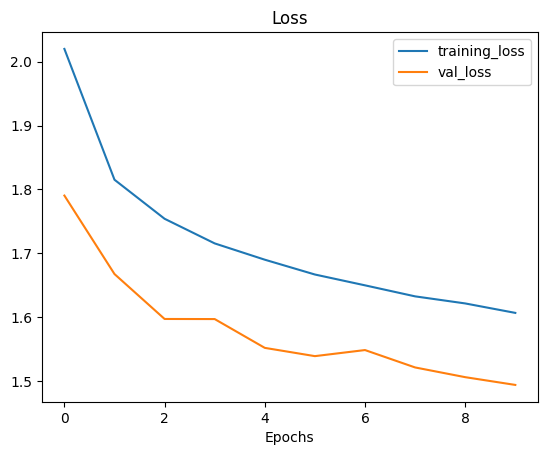

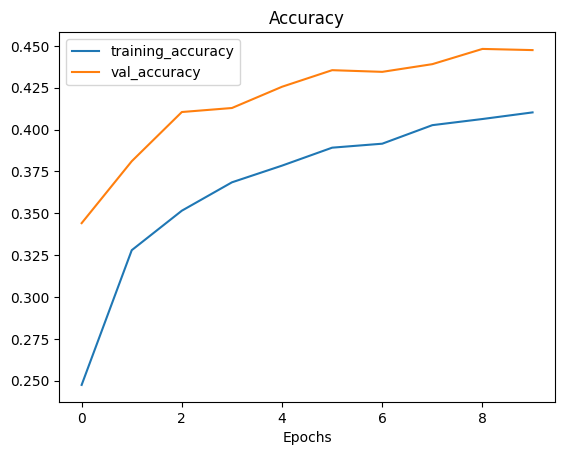

In [ ]:
plot_loss_curves(history_6)

Okay, so model_4 and model_6 are the best, lets try using these with more epochs.

In [ ]:
# Clone model_4
model_7 = tf.keras.models.clone_model(model_4)

#compile
model_7.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

#fit
history_7 = model_7.fit(
    normalised_x_train, y_train,
    validation_data = (normalised_x_val, y_val),
    epochs = 50
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2062 - loss: 2.1126 - val_accuracy: 0.3301 - val_loss: 1.8395
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3498 - loss: 1.7721 - val_accuracy: 0.3606 - val_loss: 1.7832
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3934 - loss: 1.6601 - val_accuracy: 0.4072 - val_loss: 1.6497
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4068 - loss: 1.6210 - val_accuracy: 0.4227 - val_loss: 1.6228
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4301 - loss: 1.5768 - val_accuracy: 0.4395 - val_loss: 1.5694
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4317 - loss: 1.5559 - val_accuracy: 0.4373 - val_loss: 1.5375
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4418 - loss: 1.5495 - val_accuracy: 0.4305 - val_loss: 1.5565
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4502 - loss: 1.5200

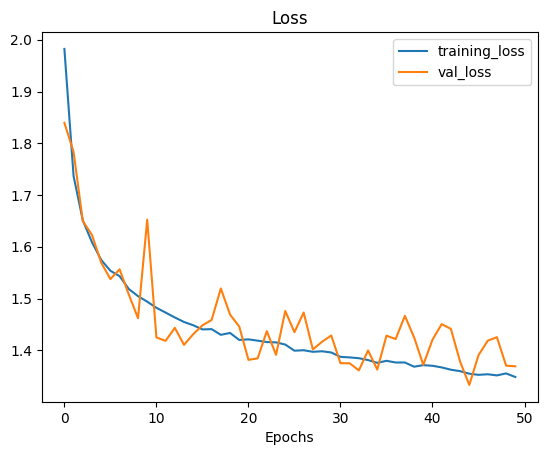

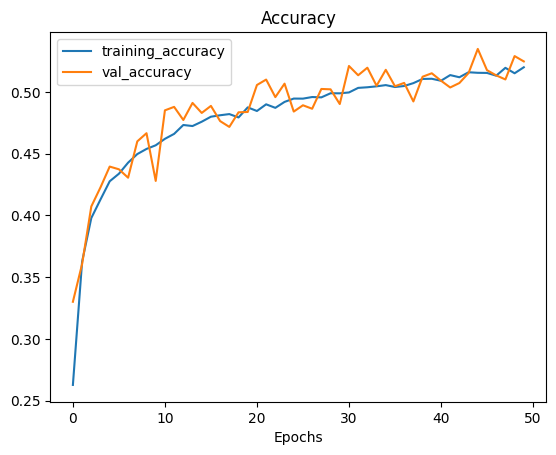

In [ ]:
plot_loss_curves(history_7)

In [ ]:
model_8 = tf.keras.models.clone_model(model_6)

# Compile
model_8.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

#fit the model
history_8 = model_6.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    epochs = 50
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4135 - loss: 1.6012 - val_accuracy: 0.4628 - val_loss: 1.4520
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4157 - loss: 1.5842 - val_accuracy: 0.4515 - val_loss: 1.4983
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4216 - loss: 1.5788 - val_accuracy: 0.4565 - val_loss: 1.4958
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4240 - loss: 1.5742 - val_accuracy: 0.4835 - val_loss: 1.4016
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4304 - loss: 1.5632 - val_accuracy: 0.4651 - val_loss: 1.4664
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4235 - loss: 1.5726 - val_accuracy: 0.4590 - val_loss: 1.4785
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4283 - loss: 1.5521 - val_accuracy: 0.4794 - val_loss: 1.4137
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4248 - loss: 1.55

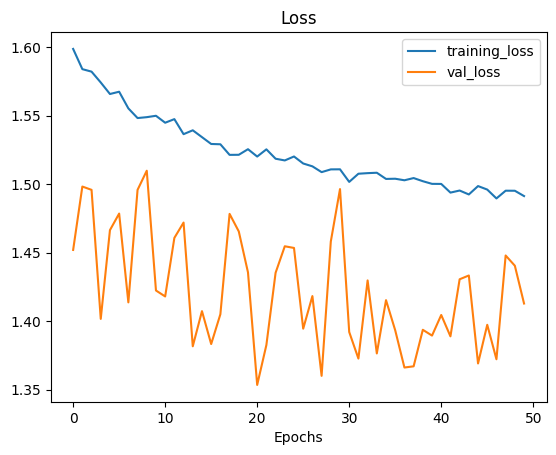

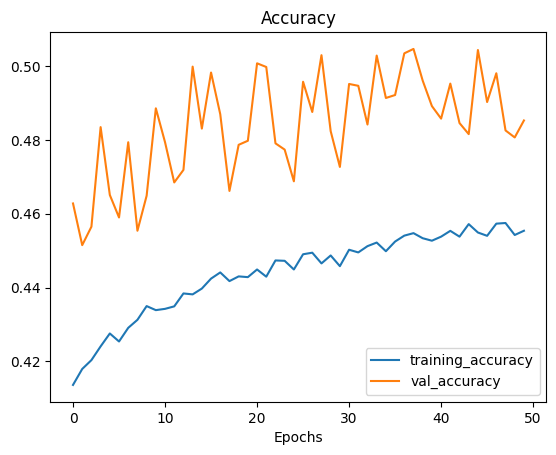

In [ ]:
plot_loss_curves(history_8)

quit clearly the model has slowed its learning down, this is most likely because of hyperparameters such as the number of filters.

In [ ]:
# try creating a model with data augmentation
model_9 = Sequential([
    Rescaling(1./255),
    data_augmentation,
    Conv2D(filters = 32, kernel_size = 3, activation='relu', input_shape=(32,32,3)),
    MaxPool2D(),
    Conv2D(filters = 64, kernel_size = 3, activation='relu'),
    MaxPool2D(),
    Conv2D(filters = 64, kernel_size = 3, activation='relu'),
    MaxPool2D(),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='softmax'),
])

# Compile
model_9.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

#fit the model
history_9 = model_9.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    epochs = 10
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2765 - loss: 1.9412 - val_accuracy: 0.4738 - val_loss: 1.4551
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4504 - loss: 1.5232 - val_accuracy: 0.5288 - val_loss: 1.3401
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4965 - loss: 1.4109 - val_accuracy: 0.5313 - val_loss: 1.3202
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5252 - loss: 1.3309 - val_accuracy: 0.5634 - val_loss: 1.2449
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5395 - loss: 1.2952 - val_accuracy: 0.5623 - val_loss: 1.2448
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5588 - loss: 1.2482 - val_accuracy: 0.5960 - val_loss: 1.1500
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5664 - loss: 1.2165 - val_accuracy: 0.6021 - val_loss: 1.1529
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5775 - loss: 1.192

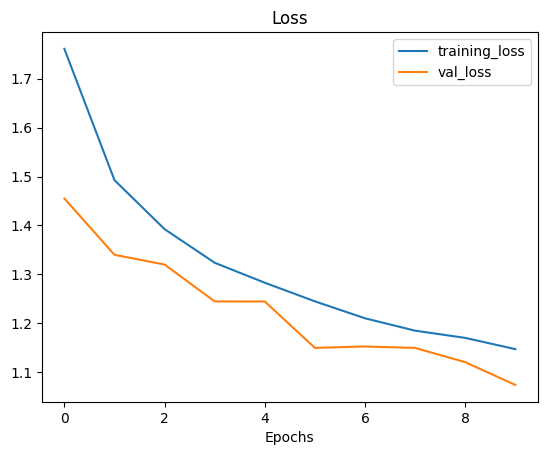

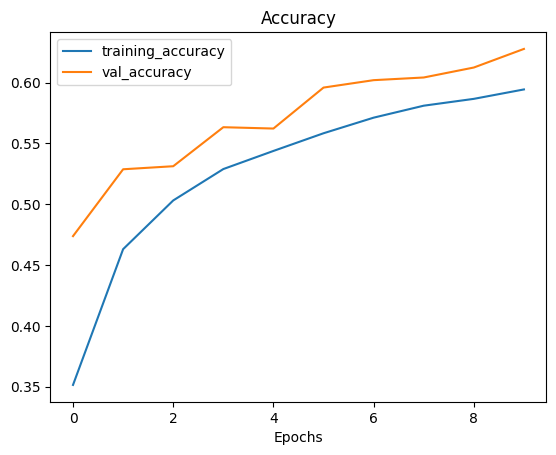

In [ ]:
plot_loss_curves(history_9)

This looks better, lets try more epochs.

In [ ]:
model_10 = tf.keras.models.clone_model(model_9)

# Compile the model
model_10.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

# Fit the model
history_10 = model_10.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    epochs = 50
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2747 - loss: 1.9552 - val_accuracy: 0.4602 - val_loss: 1.4714
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4367 - loss: 1.5499 - val_accuracy: 0.4853 - val_loss: 1.4727
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4826 - loss: 1.4351 - val_accuracy: 0.5164 - val_loss: 1.3545
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5060 - loss: 1.3610 - val_accuracy: 0.5591 - val_loss: 1.2838
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5286 - loss: 1.3101 - val_accuracy: 0.5664 - val_loss: 1.2287
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5463 - loss: 1.2731 - val_accuracy: 0.5550 - val_loss: 1.2994
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5568 - loss: 1.2507 - val_accuracy: 0.6109 - val_loss: 1.1164
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5634 - loss: 1.2280

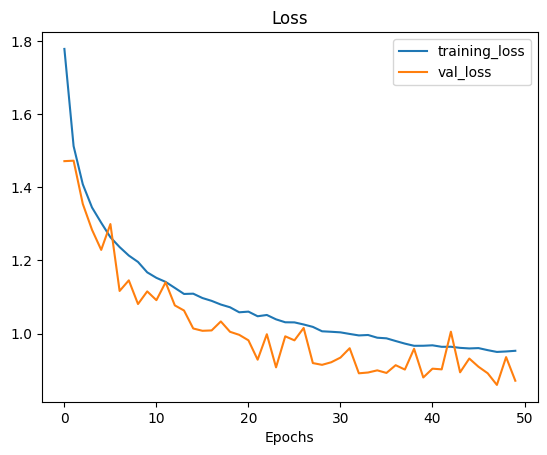

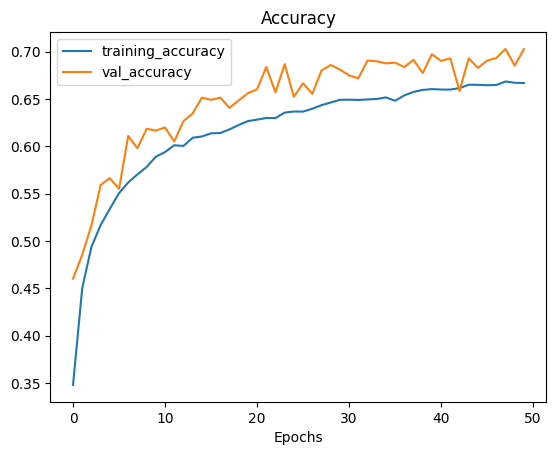

In [ ]:
plot_loss_curves(history_10)

In [ ]:
model_10.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (32, 32, 32, 3)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (32, 32, 32, 3)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (32, 30, 30, 32)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (32, 15, 15, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (32, 13, 13, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (32, 10)                    │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,672 (690.13 KB)

 Trainable params: 58,890 (230.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 117,782 (460.09 KB)

# Lets start with VGG architecture froim scratch with augmented data and all the regularization techniques learned. filters and other components.

Below model has 3 VGG blocks.

In [ ]:
# Import to create model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout, Rescaling
from tensorflow.keras import Sequential

# Data Augmentation
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
#specify image shape
img_shape = (32, 32, 3)

# Augmentation layers
data_augmentation = Sequential([
    RandomFlip("horizontal",
               input_shape = img_shape),
    RandomRotation(0.1),
    RandomZoom(0.1),
])

# try creating a model with data augmentation
model_11 = Sequential([
    Rescaling(1./255),
    data_augmentation,
    Conv2D(filters = 32, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)),
    Conv2D(filters = 32, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPool2D(),
    Conv2D(filters = 64, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(filters = 64, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPool2D(),
    Conv2D(filters = 128, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(filters = 128, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPool2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'), # will This work? what does this do?
    Dense(10, activation='softmax'),
])

# Compile
model_11.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

#fit the model
history_11 = model_11.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    epochs = 30
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.3125 - loss: 1.8774 - val_accuracy: 0.4939 - val_loss: 1.4420
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5092 - loss: 1.3721 - val_accuracy: 0.5663 - val_loss: 1.2399
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5691 - loss: 1.2043 - val_accuracy: 0.6216 - val_loss: 1.0750
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6136 - loss: 1.0884 - val_accuracy: 0.6539 - val_loss: 1.0077
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6452 - loss: 1.0011 - val_accuracy: 0.6381 - val_loss: 1.0570
Epoch 6/30


KeyboardInterrupt: 

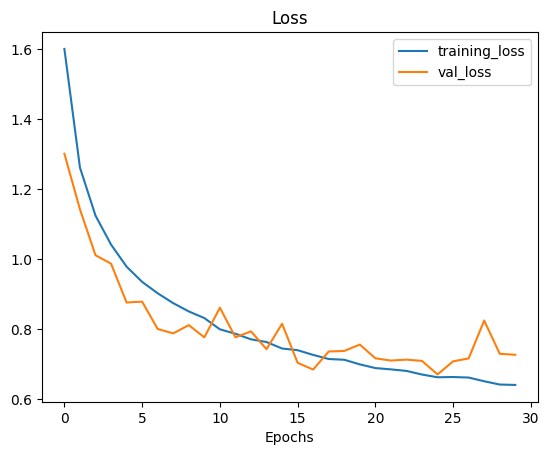

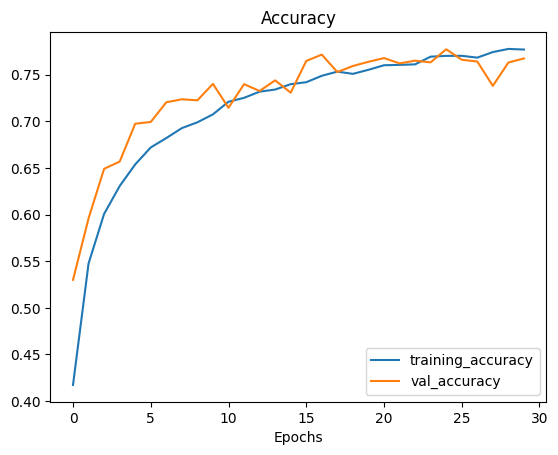

In [ ]:
plot_loss_curves(history_11)

It is the best accuracy result I have got so far however it seems to start overfitting. Maybe could add more dropout?

In [ ]:
# Currently on Model 12!

# try creating a model with dropout after dense
model_12 = Sequential([
    Rescaling(1./255),
    data_augmentation,
    Conv2D(filters = 32, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)),
    Conv2D(filters = 32, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPool2D(),
    Conv2D(filters = 64, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(filters = 64, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPool2D(),
    Conv2D(filters = 128, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(filters = 128, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPool2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'), # will This work? what does this do?
    Dropout(0.2),
    Dense(10, activation='softmax'),
])

# Compile
model_12.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

#fit the model
history_12 = model_12.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    epochs = 30
)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3177 - loss: 1.8452 - val_accuracy: 0.5104 - val_loss: 1.3801
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5061 - loss: 1.3661 - val_accuracy: 0.5949 - val_loss: 1.1393
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5825 - loss: 1.1835 - val_accuracy: 0.6396 - val_loss: 1.0342
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6070 - loss: 1.0959 - val_accuracy: 0.6505 - val_loss: 1.0152
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6339 - loss: 1.0372 - val_accuracy: 0.7093 - val_loss: 0.8393
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6549 - loss: 0.9965 - val_accuracy: 0.6715 - val_loss: 0.9300
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6696 - loss: 0.9520 - val_accuracy: 0.6892 - val_loss: 0.8978
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6808 - loss: 0

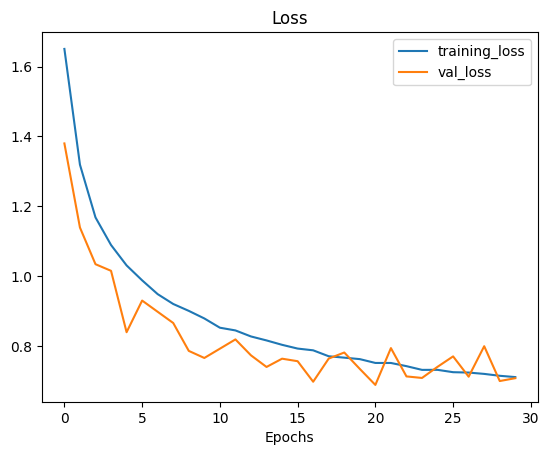

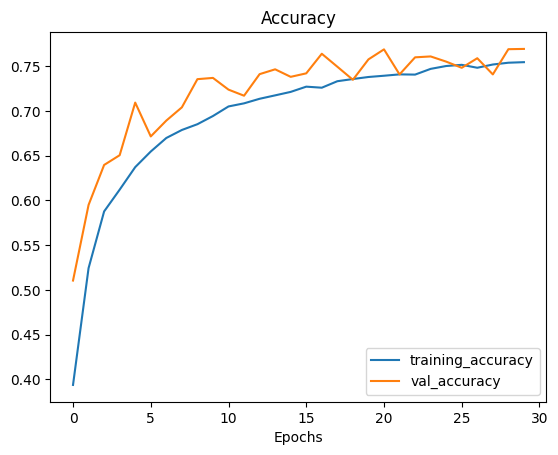

In [ ]:
plot_loss_curves(history_12)

Even better! maybe some slight alterations to reduce overfitting?

In [ ]:

# try creating a model with dropout after dense and every pooling layer
model_13 = Sequential([
    Rescaling(1./255),
    data_augmentation,
    Conv2D(filters = 32, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)),
    Conv2D(filters = 32, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPool2D(),
    Dropout(0.2),
    Conv2D(filters = 64, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(filters = 64, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPool2D(),
    Dropout(0.2),
    Conv2D(filters = 128, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(filters = 128, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPool2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'), # will This work? what does this do?
    Dropout(0.2),
    Dense(10, activation='softmax'),
])

# Compile
model_13.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

#fit the model
history_13 = model_13.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    epochs = 30
)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.2448 - loss: 2.0278 - val_accuracy: 0.4882 - val_loss: 1.4152
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4516 - loss: 1.5060 - val_accuracy: 0.5276 - val_loss: 1.3294
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5216 - loss: 1.3345 - val_accuracy: 0.5849 - val_loss: 1.2028
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5550 - loss: 1.2440 - val_accuracy: 0.6224 - val_loss: 1.0819
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5860 - loss: 1.1682 - val_accuracy: 0.6180 - val_loss: 1.1068
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.6072 - loss: 1.1122 - val_accuracy: 0.6650 - val_loss: 0.9433
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.6227 - loss: 1.0878 - val_accuracy: 0.6798 - val_loss: 0.9046
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6347 - los

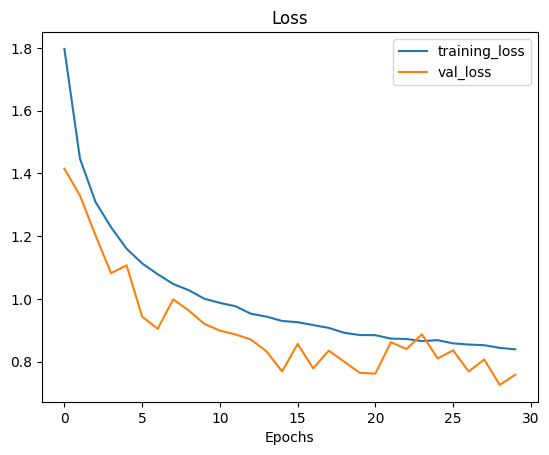

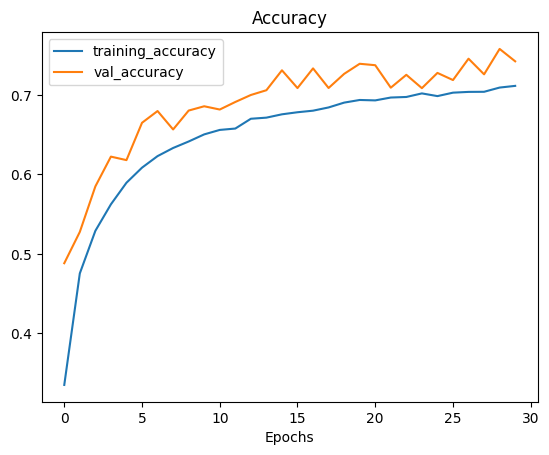

In [ ]:
plot_loss_curves(history_13)

In [ ]:
model_13.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7355 - loss: 0.7789


[0.7915888428688049, 0.7297999858856201]

In [ ]:
model_12.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7828 - loss: 0.6969


[0.7012678384780884, 0.7811999917030334]

In [ ]:
model_12.metrics_names

['loss', 'compile_metrics']

model_12 is performing better so far on test data however from the loss curves we can see that model_13 is less prone to overfitting. this means we can modt likely train for more epochs.

In [ ]:
model_13.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)              │ (32, 32, 32, 3)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (32, 32, 32, 3)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (32, 32, 32, 32)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (32, 32, 32, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (32, 16, 16, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (32, 16, 16, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (32, 16, 16, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (32, 16, 16, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (32, 8, 8, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (32, 8, 8, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (32, 8, 8, 128)             │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (32, 8, 8, 128)             │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (32, 4, 4, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (32, 4, 4, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (32, 2048)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (32, 128)                   │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (32, 128)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (32, 10)                    │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,651,712 (6.30 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,101,142 (4.20 MB)

In [ ]:
# Try for more epochs
model_14 = tf.keras.models.clone_model(model_13)

# Compile
model_14.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

#fit the model
history_14 = model_14.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    epochs = 100
)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.2420 - loss: 2.0447 - val_accuracy: 0.4170 - val_loss: 1.6070
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4539 - loss: 1.5051 - val_accuracy: 0.5460 - val_loss: 1.2639
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5172 - loss: 1.3442 - val_accuracy: 0.5914 - val_loss: 1.1578
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5536 - loss: 1.2441 - val_accuracy: 0.6348 - val_loss: 1.0326
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.5887 - loss: 1.1688 - val_accuracy: 0.6260 - val_loss: 1.0595
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6029 - loss: 1.1151 - val_accuracy: 0.6207 - val_loss: 1.1289
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6147 - loss: 1.0908 - val_accuracy: 0.6659 - val_loss: 0.9434
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6278 -

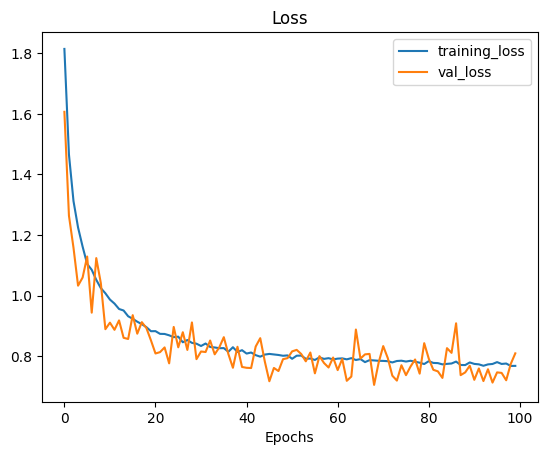

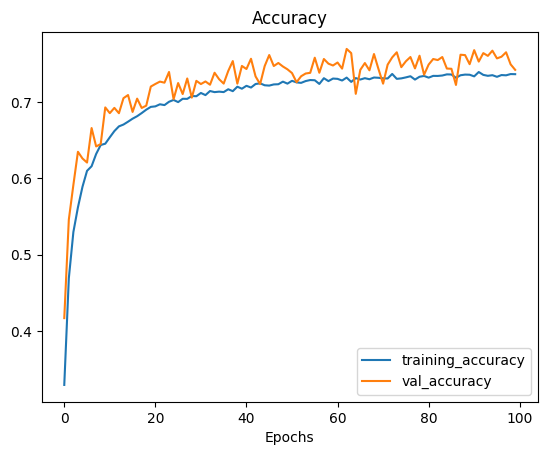

In [ ]:
plot_loss_curves(history_14)

more epochs doesn't seem to have done much.

Lets experiment with weight **decay**.

In [ ]:
# Import to create model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout, Rescaling
from tensorflow.keras import Sequential

# Data Augmentation
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
#specify image shape
img_shape = (32, 32, 3)

# Augmentation layers
data_augmentation = Sequential([
    RandomFlip("horizontal",
               input_shape = img_shape),
    RandomRotation(0.1),
    RandomZoom(0.1),
])


from tensorflow.keras.layers import Input
from tensorflow.keras.regularizers import l2

kernel_reg = l2(0.001)

# try creating a model with dropout after dense and every pooling layer
model_15 = Sequential([
    Input(shape=(32,32,3)), # creating a specific input shape layer
    Rescaling(1./255),
    data_augmentation,
    Conv2D(filters = 32, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer= kernel_reg),
    Conv2D(filters = 32, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer= kernel_reg),
    MaxPool2D(),
    Dropout(0.2),
    Conv2D(filters = 64, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer= kernel_reg),
    Conv2D(filters = 64, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer= kernel_reg),
    MaxPool2D(),
    Dropout(0.2),
    Conv2D(filters = 128, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer= kernel_reg),
    Conv2D(filters = 128, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer= kernel_reg),
    MaxPool2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer= kernel_reg), # will This work? what does this do?
    Dropout(0.2),
    Dense(10, activation='softmax'),
])

# Compile
model_15.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

#fit the model
history_15 = model_15.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    epochs = 50
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.2580 - loss: 2.6444 - val_accuracy: 0.4230 - val_loss: 1.8532
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4203 - loss: 1.7791 - val_accuracy: 0.5019 - val_loss: 1.5868
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4779 - loss: 1.6204 - val_accuracy: 0.5455 - val_loss: 1.4682
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5090 - loss: 1.5541 - val_accuracy: 0.5646 - val_loss: 1.4349
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5345 - loss: 1.5135 - val_accuracy: 0.5626 - val_loss: 1.4523
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.5510 - loss: 1.4727 - val_accuracy: 0.5928 - val_loss: 1.3508
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5597 - loss: 1.4581 - val_accuracy: 0.5969 - val_loss: 1.3639
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5734 -

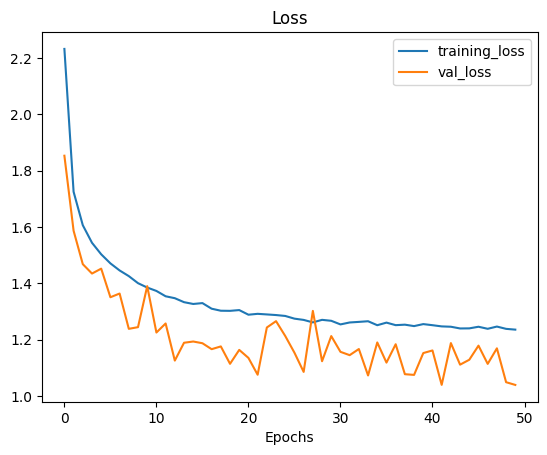

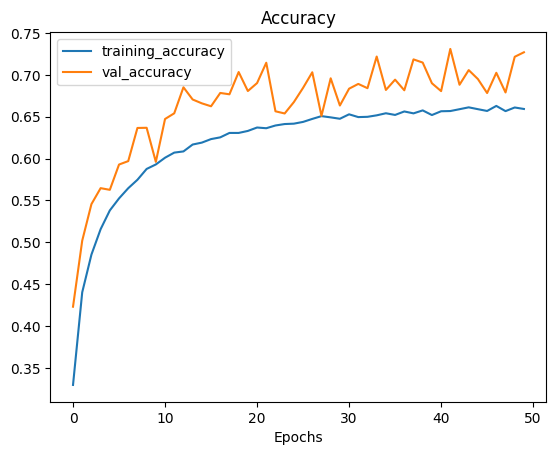

In [ ]:
plot_loss_curves(history_15)

In [ ]:
# try creating a model with increasing dropout
model_16 = Sequential([
    Input(shape=(32,32,3)), # creating a specific input shape layer
    Rescaling(1./255),
    data_augmentation,
    Conv2D(filters = 32, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(filters = 32, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPool2D(),
    Dropout(0.2),
    Conv2D(filters = 64, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(filters = 64, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPool2D(),
    Dropout(0.25),
    Conv2D(filters = 128, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(filters = 128, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPool2D(),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'), # will This work? what does this do?
    Dropout(0.4),
    Dense(10, activation='softmax'),
])

# Compile
model_16.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

#fit the model
history_16 = model_16.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    epochs = 40 # reducing for speed
)

Epoch 1/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.2292 - loss: 2.0969 - val_accuracy: 0.4519 - val_loss: 1.4569
Epoch 2/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4264 - loss: 1.5593 - val_accuracy: 0.5091 - val_loss: 1.3453
Epoch 3/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.4891 - loss: 1.4095 - val_accuracy: 0.5692 - val_loss: 1.1956
Epoch 4/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5252 - loss: 1.3272 - val_accuracy: 0.5918 - val_loss: 1.1568
Epoch 5/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5578 - loss: 1.2529 - val_accuracy: 0.5774 - val_loss: 1.1960
Epoch 6/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.5734 - loss: 1.2091 - val_accuracy: 0.6159 - val_loss: 1.0705
Epoch 7/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5925 - loss: 1.1655 - val_accuracy: 0.6423 - val_loss: 1.0301
Epoch 8/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6043 - loss: 

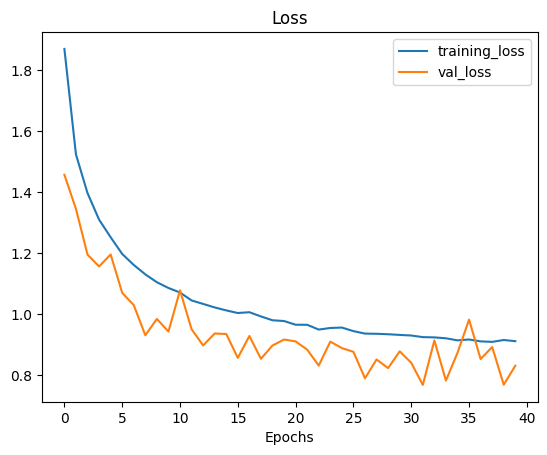

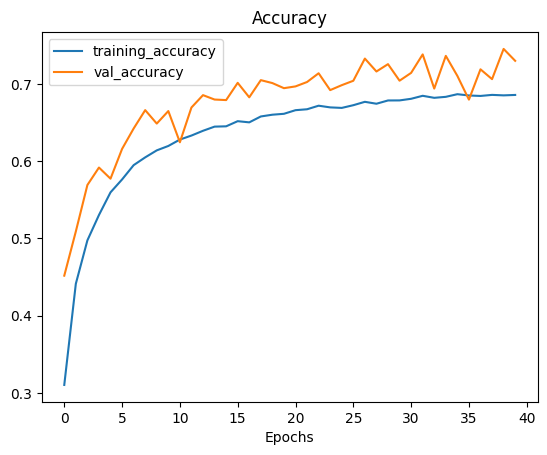

In [ ]:
plot_loss_curves(history_16)

In [ ]:
from tensorflow.keras.layers import BatchNormalization

# try creating a model with increasing dropout and creating batch normalisation layers
model_17 = Sequential([
    Input(shape=(32,32,3)), # creating a specific input shape layer
    Rescaling(1./255),
    data_augmentation,
    Conv2D(filters = 32, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Conv2D(filters = 32, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPool2D(),
    Dropout(0.2),
    Conv2D(filters = 64, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Conv2D(filters = 64, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPool2D(),
    Dropout(0.3),
    Conv2D(filters = 128, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Conv2D(filters = 128, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPool2D(),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'), # will This work? what does this do?
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

# Compile
model_17.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

#fit the model
history_17 = model_17.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    epochs = 40 # reducing for speed
)

Epoch 1/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.2983 - loss: 2.1702 - val_accuracy: 0.5018 - val_loss: 1.3742
Epoch 2/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4813 - loss: 1.4438 - val_accuracy: 0.5422 - val_loss: 1.2639
Epoch 3/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.5421 - loss: 1.2833 - val_accuracy: 0.6295 - val_loss: 1.0305
Epoch 4/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.5927 - loss: 1.1515 - val_accuracy: 0.6287 - val_loss: 1.0481
Epoch 5/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.6268 - loss: 1.0673 - val_accuracy: 0.6812 - val_loss: 0.9430
Epoch 6/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.6532 - loss: 1.0075 - val_accuracy: 0.6693 - val_loss: 0.9523
Epoch 7/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6717 - loss: 0.9654 - val_accuracy: 0.6771 - val_loss: 0.9420
Epoch 8/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.6755 -

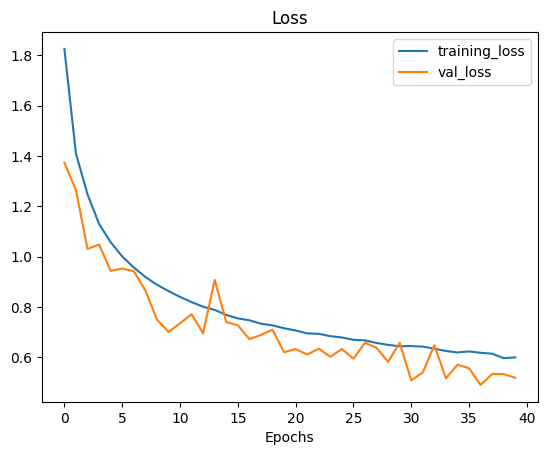

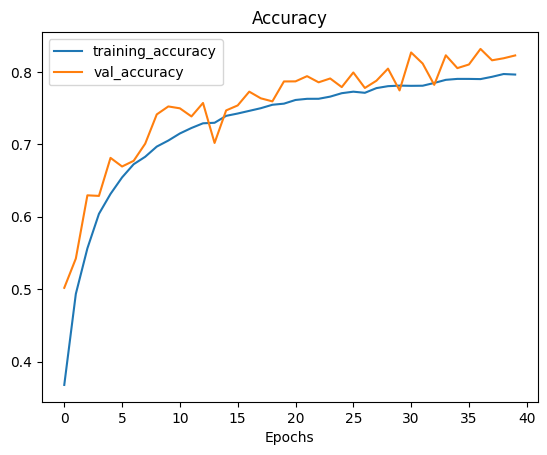

In [ ]:
plot_loss_curves(history_17)

In [ ]:
model_17.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8204 - loss: 0.5280


[0.5345398187637329, 0.8195000290870667]

In [ ]:
model_16.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7287 - loss: 0.8364


[0.8513787984848022, 0.7218000292778015]

Both ran on 40 epochs. I am happy with accuracy of model_17. it clearly shows the power of batch normalisation.

In [ ]:
# Save the model
model_17.save("model_17.keras")

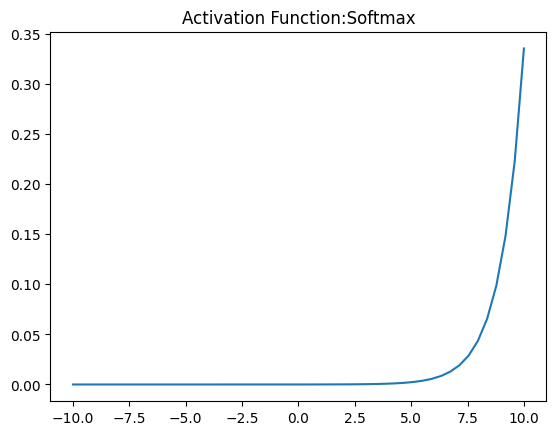

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10)
plt.plot(x, tf.keras.activations.softmax(x))
plt.axis('tight')
plt.title('Activation Function:Softmax')
plt.show()

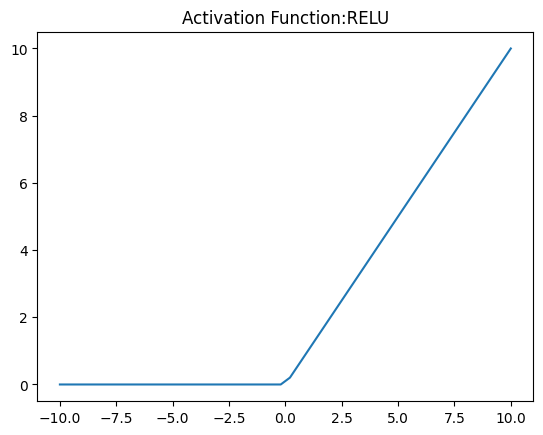

In [ ]:
x = np.linspace(-10, 10)
plt.plot(x, tf.keras.activations.relu(x))
plt.axis('tight')
plt.title('Activation Function:RELU')
plt.show()

## A couple more experiments

In [ ]:
# Import to create model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout, Rescaling, BatchNormalization, Input
from tensorflow.keras import Sequential

# Data Augmentation
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
#specify image shape
img_shape = (32, 32, 3)

# Augmentation layers
data_augmentation = Sequential([
    RandomFlip("horizontal",
               input_shape = img_shape),
    RandomRotation(0.1),
    RandomZoom(0.1),
])

# try creating a model only 2 VGG
model_18 = Sequential([
    Input(shape=(32,32,3)), # creating a specific input shape layer
    Rescaling(1./255), # Normalising the pixel values of the image
    data_augmentation,
    Conv2D(filters = 32, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Conv2D(filters = 32, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPool2D(),
    Dropout(0.2),
    Conv2D(filters = 64, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Conv2D(filters = 64, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPool2D(),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'), # Extra dense layer to help classify extracted features
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile
model_18.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

#fit the model
history_18 = model_18.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    epochs = 30)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.3493 - loss: 2.0012 - val_accuracy: 0.5287 - val_loss: 1.3129
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5092 - loss: 1.3693 - val_accuracy: 0.5897 - val_loss: 1.1670
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.5637 - loss: 1.2374 - val_accuracy: 0.6217 - val_loss: 1.0700
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.5951 - loss: 1.1545 - val_accuracy: 0.6378 - val_loss: 1.0375
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.6192 - loss: 1.0844 - val_accuracy: 0.6688 - val_loss: 0.9540
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.6305 - loss: 1.0546 - val_accuracy: 0.6287 - val_loss: 1.1208
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6521 - loss: 1.0017 - val_accuracy: 0.6800 - val_loss: 0.9421
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.6664 -

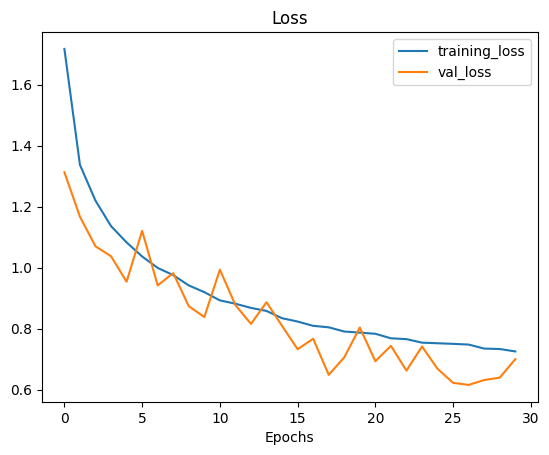

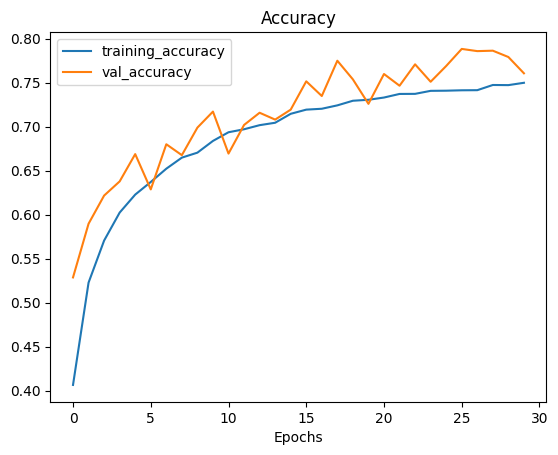

In [ ]:
plot_loss_curves(history_18)

sticking with model_17, will train on more epochs and change evaluation metrics for future.

In [ ]:
# try creating a model with increasing dropout and creating batch normalisation layers
model_19 = Sequential([
    Input(shape=(32,32,3)), # creating a specific input shape layer
    Rescaling(1./255), # Normalising the pixel values of the image
    data_augmentation,
    Conv2D(filters = 32, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Conv2D(filters = 32, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPool2D(),
    Dropout(0.2),
    Conv2D(filters = 64, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Conv2D(filters = 64, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPool2D(),
    Dropout(0.3),
    Conv2D(filters = 128, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Conv2D(filters = 128, kernel_size = 3, activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPool2D(),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'), # Extra dense layer to help classify extracted features
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile
model_19.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

#fit the model
history_19 = model_19.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    epochs = 50
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.2959 - loss: 2.1599 - val_accuracy: 0.4938 - val_loss: 1.4235
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.4917 - loss: 1.4213 - val_accuracy: 0.5723 - val_loss: 1.2268
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.5512 - loss: 1.2678 - val_accuracy: 0.6105 - val_loss: 1.1095
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5976 - loss: 1.1353 - val_accuracy: 0.6454 - val_loss: 0.9889
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.6324 - loss: 1.0615 - val_accuracy: 0.6749 - val_loss: 0.9303
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6501 - loss: 1.0119 - val_accuracy: 0.6832 - val_loss: 0.9057
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6691 - loss: 0.9645 - val_accuracy: 0.6727 - val_loss: 0.9791
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.6797 -

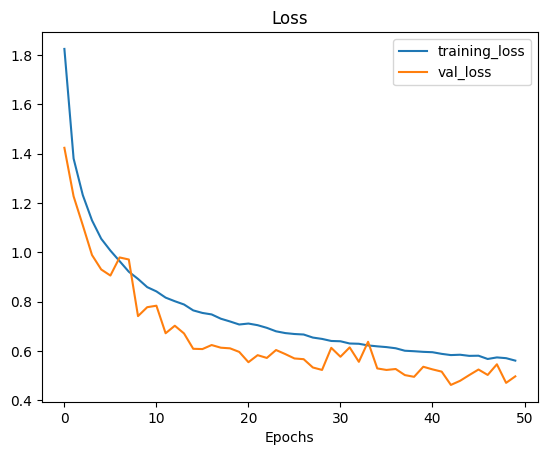

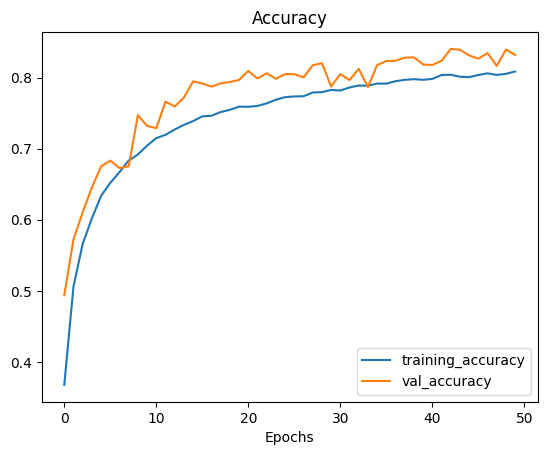

In [ ]:
plot_loss_curves(history_19)

In [ ]:
model_19.evaluate(x_val, y_val)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8364 - loss: 0.4844


[0.49703696370124817, 0.8317999839782715]

In [ ]:
model_19.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,656,320 (6.32 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

 Optimizer params: 1,103,446 (4.21 MB)

Time to train on full train set and evaluate model on test sets.

In [ ]:
# loading the data again
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
# copy model_19
model_final = tf.keras.models.clone_model(model_19)

# Compile
model_final.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

#fit the model
history_final = model_final.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 50
)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.3232 - loss: 2.0677 - val_accuracy: 0.5069 - val_loss: 1.3840
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.5090 - loss: 1.3734 - val_accuracy: 0.5501 - val_loss: 1.3710
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.5734 - loss: 1.2131 - val_accuracy: 0.6483 - val_loss: 1.0281
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.6109 - loss: 1.1098 - val_accuracy: 0.6506 - val_loss: 0.9829
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.6468 - loss: 1.0215 - val_accuracy: 0.6787 - val_loss: 0.9585
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.6654 - loss: 0.9725 - val_accuracy: 0.6908 - val_loss: 0.9017
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6809 - loss: 0.9267 - val_accuracy: 0.7185 - val_loss: 0.8278
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.6995 -

In [ ]:
model_final.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8407 - loss: 0.4737


[0.472030907869339, 0.8436999917030334]

In [ ]:
model_final.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,656,320 (6.32 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

 Optimizer params: 1,103,446 (4.21 MB)

In [ ]:
model_final.save("model_final.keras")

TypeError: cannot pickle 'module' object

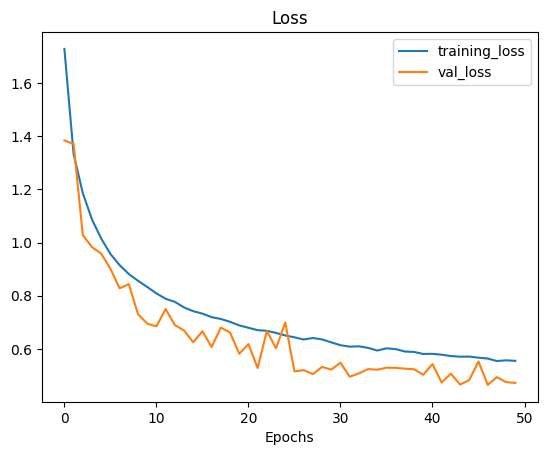

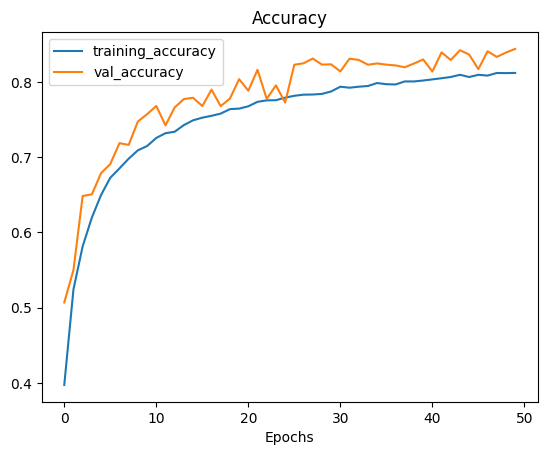

In [ ]:
plot_loss_curves(history_final)